In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
tf.autograph.set_verbosity(0)

In [4]:
# Data 
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


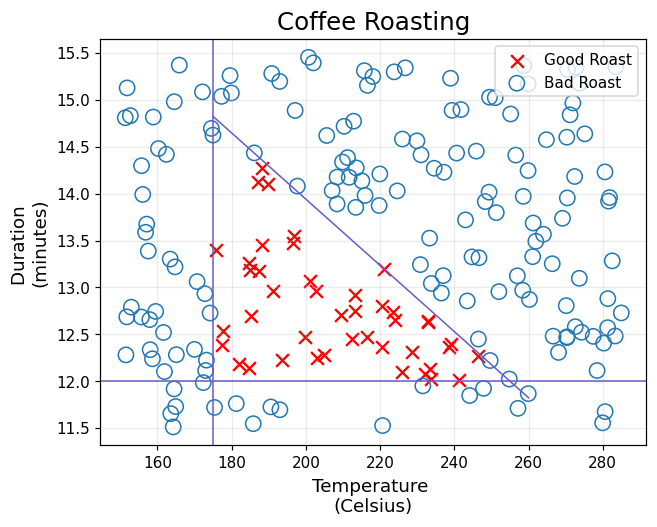

In [5]:
plt_roast(X,Y)

In [6]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [17]:
# Building the model layers manually

## Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

## Dense layer function creation where we will have weights and biases and set the number of units (neurons)
def dense(a_in, W, b):
    # a_in (ndarray (n, )): Data, 1 example
    # W    (ndarray (n,j)): Weights matrix with n features per unit (col) where we have j units ie we have j neurons
    # b    (ndarray (j, )): Bias vector with j units
    units = W.shape[1]
    a_out = np.zeros((units,))  # output activations
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]  # single linear combination per neuron
        a_out[j] = sigmoid(z)
    return a_out

## Sequence of layers, made of composing dense layers
def sequence(x, W1, b1, W2, b2):
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    return a2

In [18]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [19]:
# Prediction with the manual layers
def manual_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequence(X[i], W1, b1, W2, b2)
    return(p)

In [20]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = manual_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

/var/folders/db/nfyhgnf50fxd8qjfrpdb671c0000gn/T/ipykernel_22229/3418058770.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = sequence(X[i], W1, b1, W2, b2)


In [21]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [22]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


/var/folders/db/nfyhgnf50fxd8qjfrpdb671c0000gn/T/ipykernel_22229/3418058770.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = sequence(X[i], W1, b1, W2, b2)


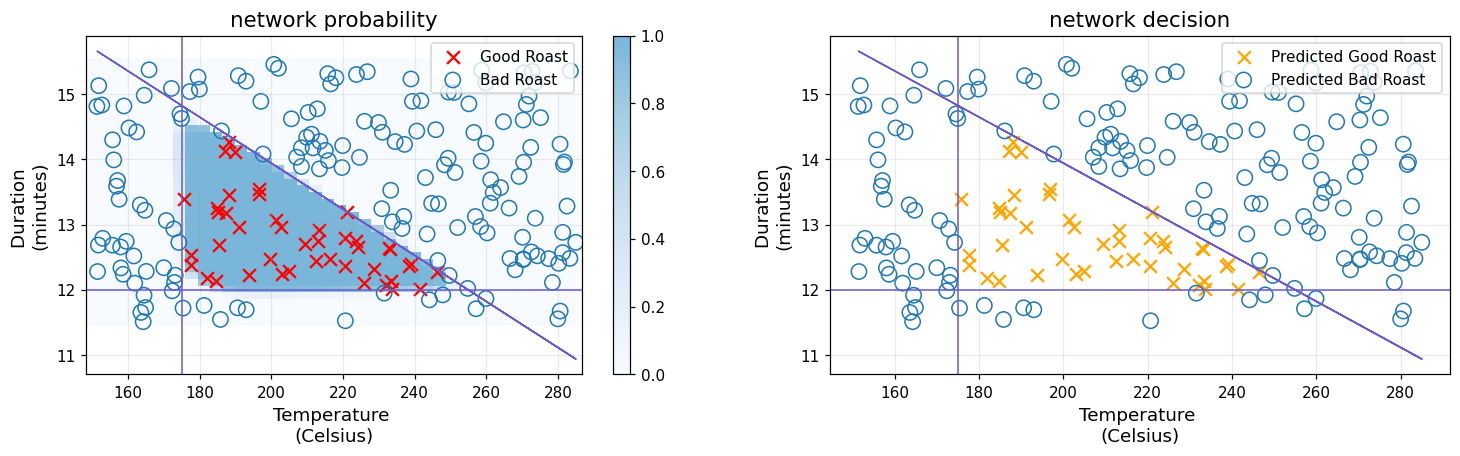

In [23]:
netf= lambda x : manual_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)